# Classic neural networks for MNIST dataset
- test of 2 and 3 neural network layers with different hidden sizes

In [3]:
%cd /opt/notebooks/basic_of_ml_image_classification

/opt/notebooks/basic_of_ml_image_classification


In [8]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import seaborn as sns

import functions.training as my_tr
import importlib
importlib.reload(my_tr)

<module 'functions.training' from 'C:\\Users\\piecz\\PycharmProjects\\basic_of_ml_image_classification\\functions\\training.py'>

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

#load data
train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

100%|██████████| 9.91M/9.91M [01:18<00:00, 126kB/s] 
100%|██████████| 28.9k/28.9k [00:00<?, ?B/s]
100%|██████████| 1.65M/1.65M [00:13<00:00, 120kB/s] 
100%|██████████| 4.54k/4.54k [00:00<00:00, 553kB/s]


### Two layers


Testing hidden_size = 32
Training time: 168.53 s
Accuracy: 0.9549


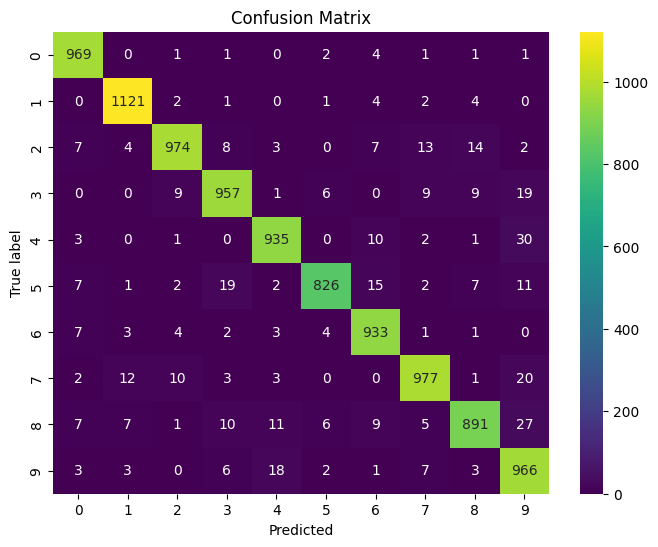


Testing hidden_size = 64


KeyboardInterrupt: 

In [10]:
hidden_sizes = [32, 64, 128, 256]

results = {}

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

for h in hidden_sizes:
    print(f"\nTesting hidden_size = {h}")
    t, acc, cm = my_tr.train_model([h], train_loader, test_loader, model_name = f"two-layer_hidden-size-{h}")

    results[h] = {
        "training_time": t,
        "accuracy": acc,
        "confusion_matrix": cm
    }

    print(f"Training time: {t:.2f} s")
    print(f"Accuracy: {acc:.4f}")
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
    plt.xlabel("Predicted")
    plt.ylabel("True label")
    plt.title("Confusion Matrix")
    plt.show()

### Three layers


Testuję hidden_size = (64, 32)
Training time: 40.17 s
Accuracy: 0.9589


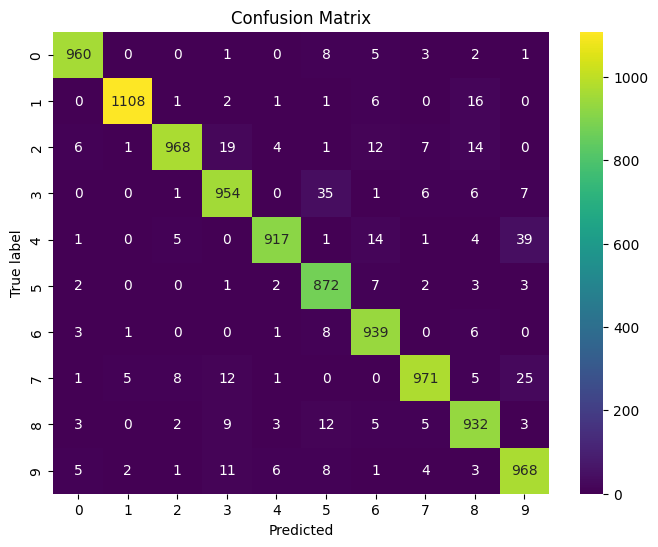


Testuję hidden_size = (128, 64)
Training time: 42.17 s
Accuracy: 0.9730


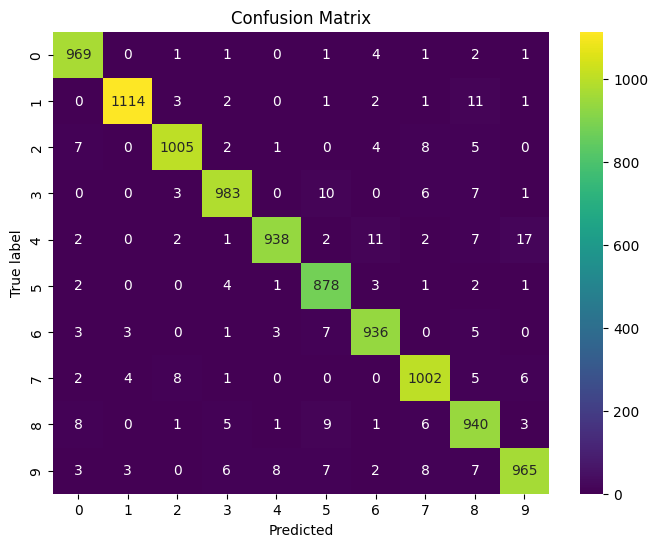


Testuję hidden_size = (256, 128)
Training time: 42.11 s
Accuracy: 0.9735


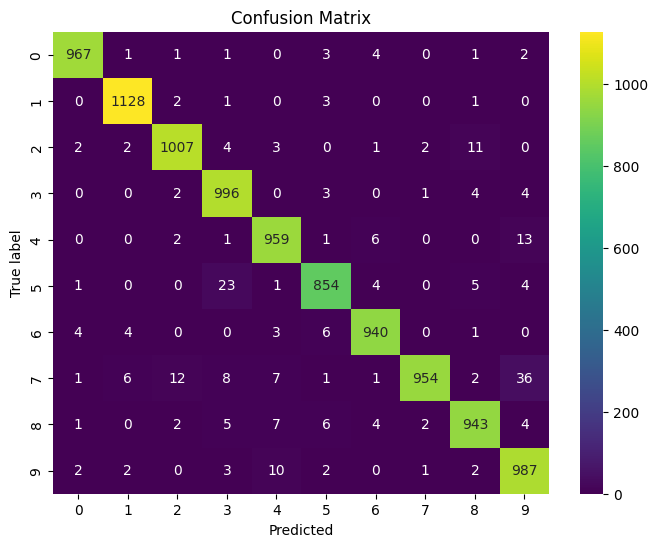


Testuję hidden_size = (512, 256)
Training time: 42.02 s
Accuracy: 0.9760


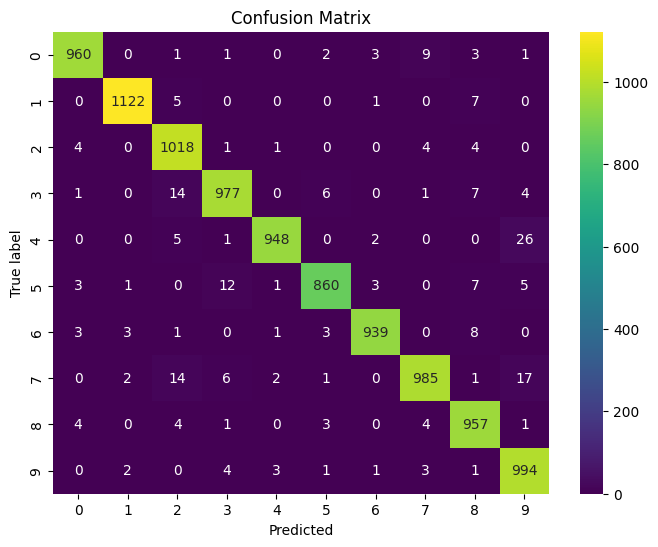

In [18]:
hidden_sizes = [(64, 32),
                (128, 64),
                (256, 128),
                (512, 256)]

results3 = {}

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

for h in hidden_sizes:
    print(f"\nTestuję hidden_size = {h}")
    t, acc, cm = my_tr.train_model(h, train_loader, test_loader)

    results[h] = {
        "training_time": t,
        "accuracy": acc,
        "confusion_matrix": cm
    }

    print(f"Training time: {t:.2f} s")
    print(f"Accuracy: {acc:.4f}")
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
    plt.xlabel("Predicted")
    plt.ylabel("True label")
    plt.title("Confusion Matrix")
    plt.show()